<a href="https://colab.research.google.com/github/Shiva498689/GDG_PS/blob/main/GDG_PS_1_t1_from_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install yfinance pandas matplotlib torch


In [ ]:
pip install git+https://github.com/amazon-science/chronos-forecasting.git


  Cloning https://github.com/amazon-science/chronos-forecasting.git to /tmp/pip-req-build-mfi49bty
  Running command git clone --filter=blob:none --quiet https://github.com/amazon-science/chronos-forecasting.git /tmp/pip-req-build-mfi49bty
  Resolved https://github.com/amazon-science/chronos-forecasting.git to commit 1f099eb265a4b423529929321929d4258dc031d8
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for chronos-forecasting: filename=chronos_forecasting-2.2.2-py3-none-any.whl size=73518 sha256=bbe891eff8b6bbb4a846ce1fdd87ef098867ff024e84167501abac87714a50f3
  Stored in directory: /tmp/pip-ephem-wheel-cache-e1115u5v/wheels/b9/a6/b5/75fca7306751a3bc92a63680f861f44a42a8776f6423cf0188
Successfully built chronos-forecasting


In [ ]:
import yfinance as yf# used to get the stock price data
import torch # Chronos T5 needs the torch tensors to be feeded inside
import numpy as np # for calculating statistical terms
import pandas as pd # to deal with dataframe got by yfinance lib
import matplotlib.pyplot as plt # for plotting basic graph
from chronos import ChronosPipeline # Amazon's prebuilt model trained on various such datasets like whether , stocks , computer signals etc. and learns the sequence like
# langauge to make predictions

In [ ]:
def get_stock_data(ticker):
  obj = yf.Ticker(ticker)
  data = obj.history(period = '5y')
  closing_prices = data['Close']
  return data


In [ ]:
prediction  = ChronosPipeline.from_pretrained("amazon/chronos-t5-small"  ,device_map = 'cpu'  , torch_dtype = torch.float32 )# defining prediction model

ticker = input("Please enter the ticker name you have to make predictions for : ")

data = get_stock_data(ticker.upper())# getting yfinance dataframe

context = torch.tensor(data['Close'].values)#Extracting 'Close' column from yfinance 'data' dataframe

final_prediction= prediction.predict(context , prediction_length = 7 , num_samples = 10)

predicted_array = final_prediction[0].numpy()# returns a 3d array hence taking the 1st index in the height

median  = np.median(predicted_array , axis = 0 ) # the number of predicted values for each day is equal to num_samples , hence taking median
lower = np.quantile (predicted_array , 0.1 , axis =0)# considering 10th percentile indexed as lower bound for prediction cloud
upper = np.quantile(predicted_array , 0.9 , axis = 0)# considering 90th percentile indexed as upper bound for prediction cloud



Please enter the ticker name you have to make predictions for : AAPL


In [ ]:
print(median)

[248.67717 248.67717 248.67717 249.48456 251.09937 251.09937 251.09937]


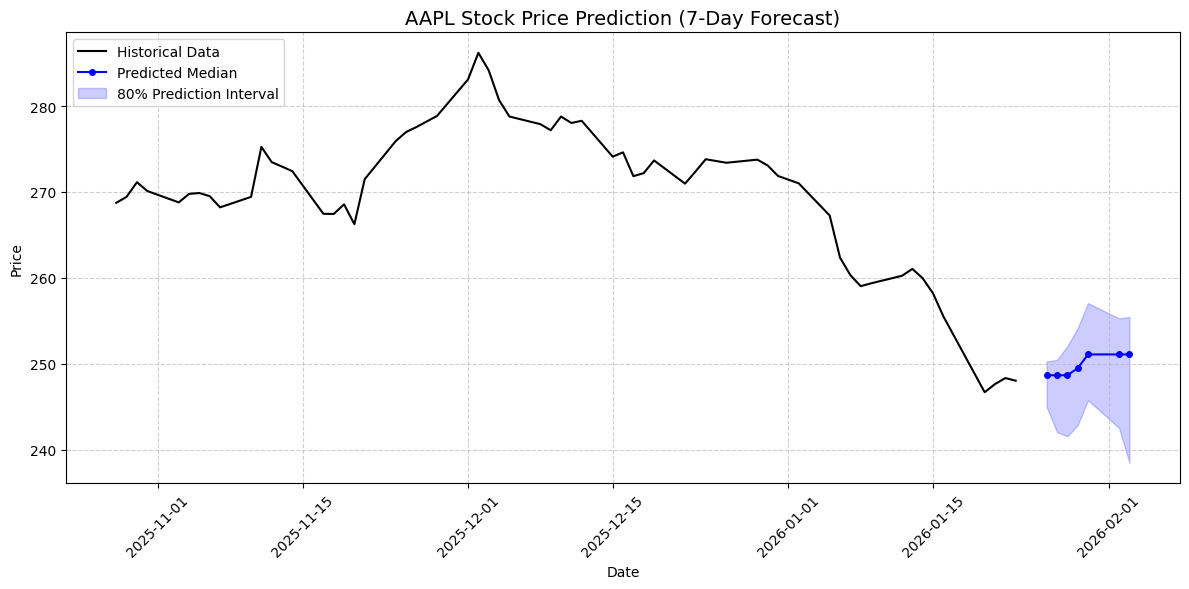

In [ ]:




last_date = data.index[-1]
forecast_dates = pd.bdate_range(start=last_date + pd.Timedelta(days=1), periods=7)#start from the day after  the last date in y finance column

# period to predicted is 7 days
# caution there are chances to reduce the accuracy in prediction as the number of days in the period of prediction gets increased

plt.figure(figsize=(12, 6))


plt.plot(data.index[-60:], data['Close'][-60:], label="Historical Data", color='black', linewidth=1.5) # plot the historical data -- 60 days


plt.plot(forecast_dates, median, label="Predicted Median", color='blue', marker='o', markersize=4)# plot the median prediction made by the model

# Plot the Confidence Interval (the "Range")
plt.fill_between(
    forecast_dates,
    lower,
    upper,
    color='blue',
    alpha=0.2,
    label="80% Prediction Interval"
)


plt.title(f"{ticker.upper()} Stock Price Prediction (7-Day Forecast)", fontsize=14)# title
plt.xlabel("Date")# date label on x- axis
plt.ylabel("Price") # Price on y axis
plt.grid(True, linestyle='--', alpha=0.6) # Enabling the grid
plt.legend(loc='upper left')


plt.xticks(rotation=45)# rotating the labels as learned from experiments
plt.tight_layout()# separates the dates hence provides them from overlapping

plt.show()